# Data Description:
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [6]:
import warnings
warnings.filterwarnings("ignore") 

In [7]:
import pandas as pd
import numpy as ny 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,patient's year of operation,num. pos axillary nodes detected,survival status (1=survived 5+ years; 2=died within 5 years)
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
haberman.shape

(306, 4)

In [10]:
haberman.columns

Index(['age', 'patient's year of operation',
       'num. pos axillary nodes detected',
       'survival status (1=survived 5+ years; 2=died within 5 years)'],
      dtype='object')

 There are four attributes in this data set, those are.
  1. age
  2. patients year of operations
  3. NO of positive axillary nodes detected
  4. survival status (1=survived 5+ years; 2=died within 5 years)

In [11]:
haberman['num. pos axillary nodes detected'].max()

52

In [12]:
#This code tells in which index number, 
#the max value of num. pos axillary nodes occures
maximum=0
for i,value in enumerate(haberman['num. pos axillary nodes detected']):
    if value>maximum:
        maximum=value
        index=i
index

62

In [13]:
haberman.iloc[62]

age                                                             43
patient's year of operation                                     58
num. pos axillary nodes detected                                52
survival status (1=survived 5+ years; 2=died within 5 years)     2
Name: 62, dtype: int64

In [14]:
haberman["survival status (1=survived 5+ years; 2=died within 5 years)"].value_counts()

1    225
2     81
Name: survival status (1=survived 5+ years; 2=died within 5 years), dtype: int64

### The above code show, how many survived and how many died

In [15]:
haberman["survival status (1=survived 5+ years; 2=died within 5 years)"] = haberman["survival status (1=survived 5+ years; 2=died within 5 years)"].map({1:1,2:0})

In [16]:
haberman["survival status (1=survived 5+ years; 2=died within 5 years)"].value_counts()

1    225
0     81
Name: survival status (1=survived 5+ years; 2=died within 5 years), dtype: int64

### In the above code i converted, Survivals =1 and Died = 0

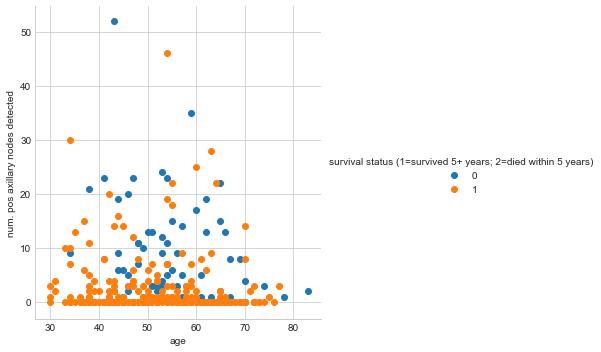

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = "survival status (1=survived 5+ years; 2=died within 5 years)", size =5 )\
.map(plt.scatter, 'age',"num. pos axillary nodes detected")\
     .add_legend();
plt.show()
# Observations From the below plot.
# 1) There is no particular relation between num pos axillary nodes detected and age
# 2) And we can state with 60% confidence, that if the number of auxilary nodes are more, the deaths are also more.

#### we would like to identify any relation between the survival and Dead
 For this we would like to see the relations between different attributes
 Inorder to answer the above questions we will consider Pair plots.

##  PAIR PLOTS 

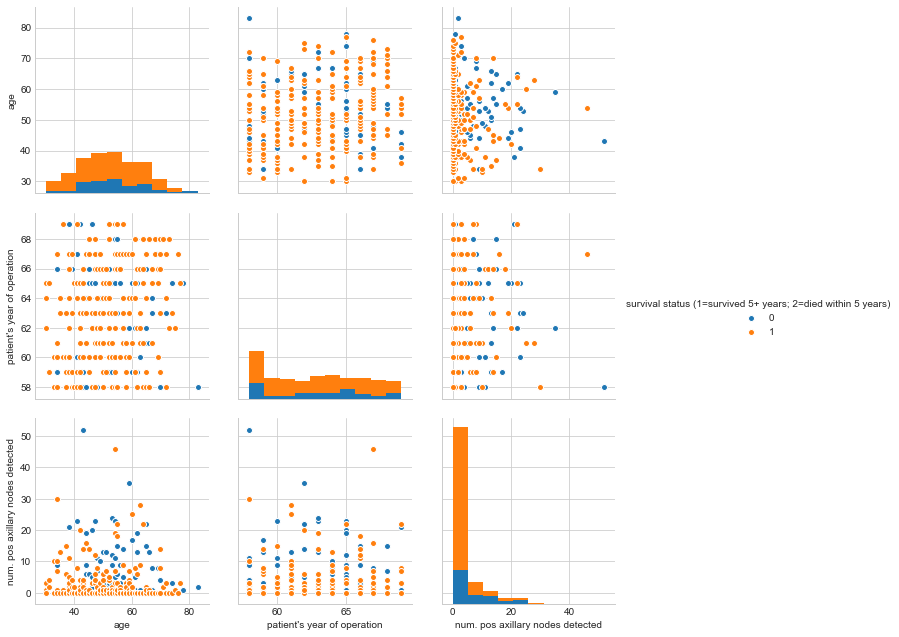

In [18]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue ="survival status (1=survived 5+ years; 2=died within 5 years)",\
             vars = ['age',"patient's year of operation","num. pos axillary nodes detected"],  size =3 );
plt.show()

### observations
 1) From the above graph. We can state that, it cannot be lineraly seperable.
 
 2) It is very hard to state, the dependent variable by looking at the above graphs.

# 1-D,Histogram, PDF, CDF ##

Text(0,0.5,'Zeros')

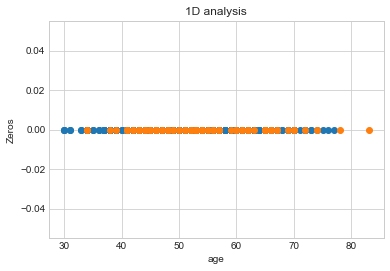

In [19]:
import numpy as np
survived = haberman.loc[haberman["survival status (1=survived 5+ years; 2=died within 5 years)"] == 1];
died = haberman.loc[haberman["survival status (1=survived 5+ years; 2=died within 5 years)"] == 0];
plt.plot(survived['age'],np.zeros_like(survived['age']),'o')
plt.plot(died['age'],np.zeros_like(died['age']),'o')
plt.title("1D analysis")
plt.xlabel("age")
plt.ylabel("Zeros")

Text(0,0.5,'Zeros')

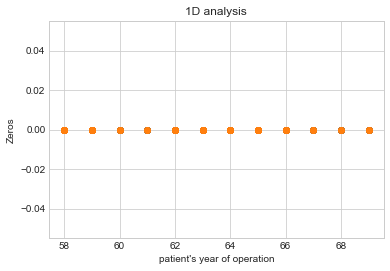

In [20]:
plt.plot(survived["patient's year of operation"],np.zeros_like(survived["patient's year of operation"]),'o')
plt.plot(died["patient's year of operation"],np.zeros_like(died["patient's year of operation"]),'o')
plt.title("1D analysis")
plt.xlabel("patient's year of operation")
plt.ylabel("Zeros")

 1) The above is one of the best example, to choose the atribute properly.
 
 2) The reason for why we cannot see the died people data points is,
    there are more no of survived people in a year and the points are overlaped on each other

Text(0,0.5,'Zeros')

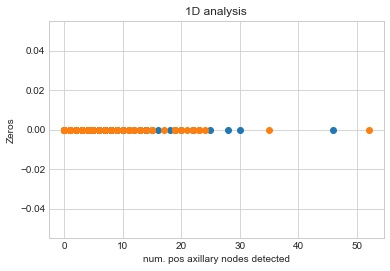

In [21]:
plt.plot(survived["num. pos axillary nodes detected"],np.zeros_like(survived["num. pos axillary nodes detected"]),'o')
plt.plot(died["num. pos axillary nodes detected"],np.zeros_like(died["num. pos axillary nodes detected"]),'o')
plt.title("1D analysis")
plt.xlabel("num. pos axillary nodes detected")
plt.ylabel("Zeros")

1) From the above "num. pos axillary nodes detected" plot we cannot summarize any points.

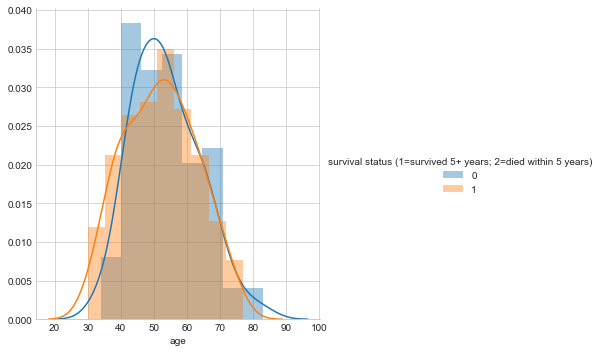

In [22]:
sns.FacetGrid(haberman, hue ="survival status (1=survived 5+ years; 2=died within 5 years)", size = 5 )\
.map(sns.distplot, "age").add_legend()

From the plot we can say that, there is no relation between the ages and deaths. Because we can observe the symmetricity of Dead and survived PDF 

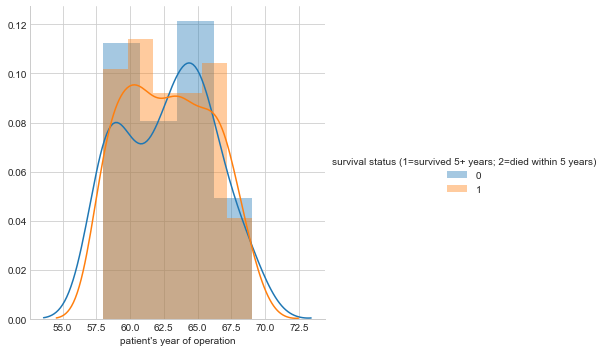

In [23]:
sns.FacetGrid(haberman, hue = "survival status (1=survived 5+ years; 2=died within 5 years)", size =5)\
.map(sns.distplot,"patient's year of operation").add_legend()

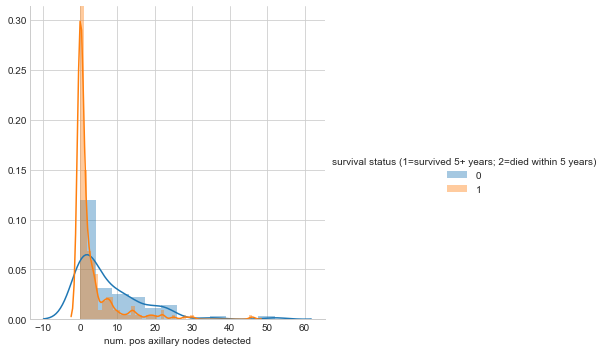

In [24]:
sns.FacetGrid(haberman, hue = "survival status (1=survived 5+ years; 2=died within 5 years)", size =5)\
.map(sns.distplot, "num. pos axillary nodes detected").add_legend()

From the above plot we can say that, if the no of positive axillary nodes are praportional to deaths.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0,0.5,'% of people')

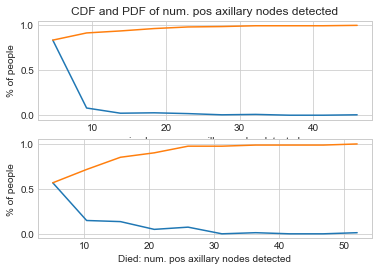

In [26]:
count, bin_edges = np.histogram(survived["num. pos axillary nodes detected"], bins = 10, density = True)
pdf = count/sum(count)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.subplot(2,1,1)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF and PDF of num. pos axillary nodes detected")
plt.xlabel("survived: num. pos axillary nodes detected")
plt.ylabel("% of people")

count, bin_edges = np.histogram(died["num. pos axillary nodes detected"], bins = 10, density = True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.subplot(2,1,2)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Died: num. pos axillary nodes detected")
plt.ylabel("% of people")

Text(0,0.5,'% of people')

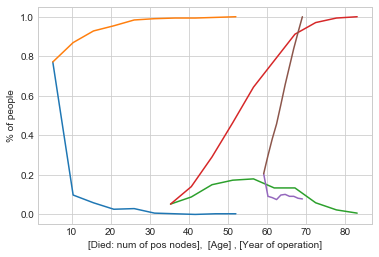

In [43]:
# num. pos axillary nodes detected
count, bin_edges = np.histogram(haberman["num. pos axillary nodes detected"], bins = 10, density = True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
# Age
count, bin_edges = np.histogram(haberman["age"], bins = 10, density = True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
# year of operation
count, bin_edges = np.histogram(haberman["patient's year of operation"], bins = 10, density = True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("[Died: num of pos nodes],  [Age] , [Year of operation]")
plt.ylabel("% of people")

In [28]:
# Mean and Std-dev
print("Means:")
print(np.mean(haberman['num. pos axillary nodes detected']))
print(np.mean(haberman['age']))
print(np.mean(haberman["patient's year of operation"]))
print("Std-dev")
print(np.std(haberman['num. pos axillary nodes detected']))
print(np.std(haberman['age']))
print(np.std(haberman["patient's year of operation"]))

Means:
4.026143790849673
52.45751633986928
62.85294117647059
Std-dev
7.177896092811152
10.78578520363183
3.244090833563246


### median, Quantile, 90th percentile, IMD

In [30]:
print("median")
print(np.median(haberman['num. pos axillary nodes detected']))
print(np.median(haberman["age"]))
print(np.median(haberman["patient's year of operation"]))
print("Quantile")
print(np.percentile(haberman["num. pos axillary nodes detected"],np.arange(0,100,25)))
print(np.percentile(haberman["age"],np.arange(0,100,25)))
print(np.percentile(haberman["patient's year of operation"],np.arange(0,100,25)))
print("90th percentile:")
print(np.percentile(haberman["num. pos axillary nodes detected"],90))
print(np.percentile(haberman["age"],90))
print(np.percentile(haberman["patient's year of operation"],90))
from statsmodels import robust
print("IMD:")
print(robust.mad(haberman["num. pos axillary nodes detected"]))
print(robust.mad(haberman["age"]))
print(robust.mad(haberman["patient's year of operation"]))

median
1.0
52.0
63.0
Quantile
[0. 0. 1. 4.]
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
90th percentile:
13.0
67.0
67.0
IMD:
1.482602218505602
11.860817748044816
4.447806655516806


### Box plot

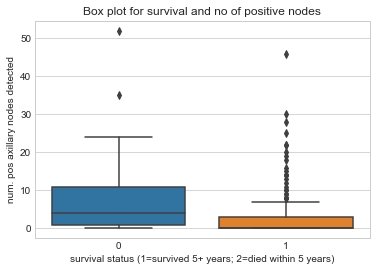

In [32]:
sns.boxplot(x = "survival status (1=survived 5+ years; 2=died within 5 years)",y = "num. pos axillary nodes detected",\
            data = haberman).set_title("Box plot for survival and no of positive nodes")
plt.show()

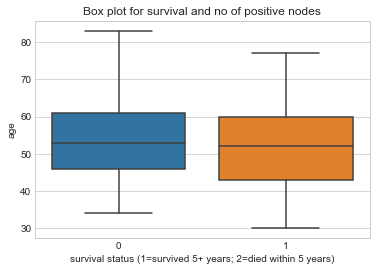

In [33]:
sns.boxplot(x = "survival status (1=survived 5+ years; 2=died within 5 years)",y = "age",\
            data = haberman).set_title("Box plot for survival and no of positive nodes")
plt.show()

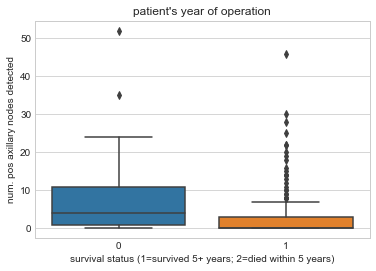

In [34]:
sns.boxplot(x = "survival status (1=survived 5+ years; 2=died within 5 years)",y = "num. pos axillary nodes detected",\
            data = haberman).set_title("patient's year of operation")
plt.show()

### Violin plots

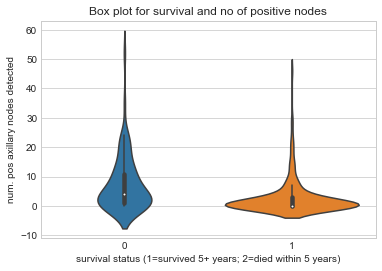

In [36]:
sns.violinplot(x = "survival status (1=survived 5+ years; 2=died within 5 years)",y = "num. pos axillary nodes detected",\
            data = haberman).set_title("Box plot for survival and no of positive nodes")
plt.show()

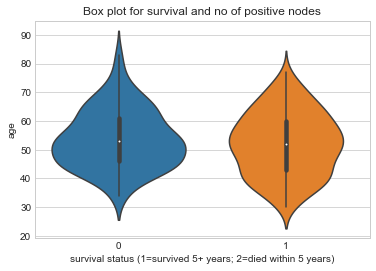

In [37]:
sns.violinplot(x = "survival status (1=survived 5+ years; 2=died within 5 years)",y = "age",\
            data = haberman).set_title("Box plot for survival and no of positive nodes")
plt.show()

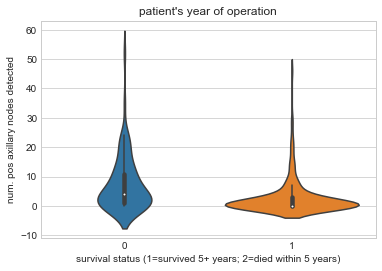

In [38]:
sns.violinplot(x = "survival status (1=survived 5+ years; 2=died within 5 years)",y = "num. pos axillary nodes detected",\
            data = haberman).set_title("patient's year of operation")
plt.show()

### 2D-contur plot

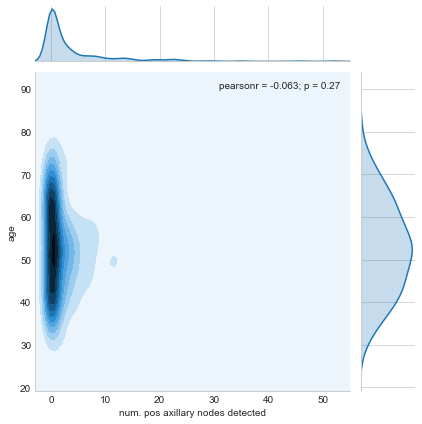

In [40]:
sns.jointplot(x="num. pos axillary nodes detected", y="age", data= haberman, kind="kde");
plt.show();


Ref: I took the Exploratory data analysis as the reference to complete the above assingment
